# Modelling Wind Speed and Direction Distribution using Gaussain Mixture Modles (OEN method)

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Modles, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
load_libs()

## 1.2 Read Data

In [2]:
# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # weird shape at 3, maybe 4
# ipath= './data/NCDC/uk/middle_wallop/dat.txt'
# ipath= './data/NCDC/uk/southhamption/dat.txt'
# ipath= './data/NCDC/uk/bournemouth/dat.txt'
# ipath= './data/NCDC/tiree.txt'
# ipath= "./data/NCDC/marham.txt"
# ipath= "./data/NCDC/uk/holbeach/dat.txt"
# ipath= "./data/NCDC/uk/weybourne/dat.txt"
# ipath= "./data/NCDC/uk/cambridge/dat.txt"
# ipath= "./data/NCDC/uk/wattisham/dat.txt"
# ipath= "./data/NCDC/uk/lakenheath/dat.txt" # irregular sampling time
# ipath= "./data/NCDC/uk/mildenhall/dat.txt" # irregular sampling time

# ipath= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # recent 5 year maybe corrupted
# ipath= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # high initial data
# ipath= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # corrupted
# ipath= "./data/NCDC/east_asia/cheongju_intl/dat.txt"
# ipath= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year data is corrupted

# ipath= "./data/NCDC/canada/melita_man/dat.txt" 
# ipath= "./data/NCDC/canada/manouane_est_que/dat.txt"  
# ipath= "./data/NCDC/canada/st_johns_intl/dat.txt" # lack 2011-12
# ipath= "./data/NCDC/canada/mildred_lake_alta/dat.txt"  # uptail wind speed 
# ipath= "./data/NCDC/canada/fort_smith/dat.txt" # hard to fit
# ipath= "./data/NCDC/canada/havre_st_pierre/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/moosonee_awos/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/hay_rivier_a/dat.txt" # truncate
# ipath= "./data/NCDC/canada/gander_intl/dat.txt" # truancate dataset, try 4, lack of 2011-12
# ipath= "./data/NCDC/canada/tukialik_bay/dat.txt" # truncate, time shift
# ipath= "./data/NCDC/canada/lac_benoit_que/dat.txt" # has 0 speed records
# ipath= "./data/NCDC/canada/blank_sablon/dat.txt" # truncate
# ipath= "./data/NCDC/canada/argentia/dat.txt" # weird shape
# ipath= "./data/NCDC/canada/longue_pointe/dat.txt" # data may have problem, weird direction distribution

ipath= "./data/NCDC/europe/avord/dat.txt" # try 4
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4, wathc for KDE bandwidth
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # double peak
# ipath= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; narror ellipse
# ipath= "./data/NCDC/europe/barayas/dat.txt" # 
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer
# ipath= "./data/NCDC/europe/salamanca/dat.txt" # recent 5 year is truncate data, before is better

# ipath= "./data/NCDC/south_america/senador_petronio/dat.txt"
# ipath= "./data/NCDC/south_america/ambrosio_lv/dat.txt" # 16 sectors

# ipath= "./data/NCDC/oceania/narrandera/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane/dat.txt" # bad fit
# ipath= "./data/NCDC/oceania/auckland/dat.txt"  # Weird KDE shape

# ipath= "./data/NCDC/cn/luogang/dat.txt"  # 
# ipath= "./data/NCDC/cn/binhai/dat.txt" # recent 5 may be corrupted, before is better
# ipath= "./data/NCDC/cn/tianjing/dat.txt"  
# ipath= "./data/NCDC/cn/南京lukou/dat.txt" # could apply width/length constrain
# ipath= "./data/NCDC/cn/gushi/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/yueyang/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/wuxu/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/广州baiyun/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/武汉tianhe/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/zhengding/dat.txt" #  Initial data weird
# ipath= "./data/NCDC/cn/wusu/dat.txt" # initial speed weird
# ipath= "./data/NCDC/cn/beijing/dat.txt"  # very bad fit

# ipath= "./data/NCDC/cn/baoan_intl/dat.txt" # 
# ipath= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" 
# ipath= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# ipath= './data/NCDC/cn/macau/dat.txt' # not good, feels like truncate data
# ipath= "./data/NCDC/cn/hk_intl/dat.txt" # truncate dataset

## US dataset, is mostly truncate, low wind speed is not complete
# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset, but recent 5 year maybe corrupted
# ipath= "./data/NCDC/us/sacramento_arp/dat.txt"  
# ipath= "./data/NCDC/us/st_louis_arp/9511346969491dat.txt"  
# ipath= './data/NCDC/us/huron/3461896967321dat.txt'
# ipath= "./data/NCDC/us/baltimore/9963956959409dat.txt"
# ipath= './data/NCDC/us/kennedy/5807936958436dat.txt'
# ipath= './data/NCDC/us/newark/8455636958433dat.txt'
# ipath= './data/NCDC/us/la_guardia/1057036958434dat.txt'
# ipath= "./data/NCDC/us/olympia_airport/2647036962786dat.txt" 
# ipath= "./data/NCDC/us/sidney/6062326959357dat.txt" 
# ipath= "./data/NCDC/us/general_mitchell_intl/dat.txt"
# ipath= "./data/NCDC/us/quad_city_arp/dat.txt" 

## Problem dataset
# ipath= "./data/NCDC/canada/stony_rapids_arpt/dat.txt" # truncate data
# ipath= "./data/NCDC/canada/baker_lake/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/rankin_inlet/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/deer_lake_a/dat.txt" # bad dataset
# ipath= './data/NCDC/europe/tenerife_sur/dat.txt'  # recent year speed wired
# ipath= "./data/NCDC/south_america/carlos_ibanez/dat.txt" # bad dataset, direction
# ipath= "./data/NCDC/south_america/rio_cuarto/dat.txt"  # bad dataset
# ipath= "./data/NCDC/south_america/senador_nilo/dat.txt" # bad dataset, direction 
# ipath= "./data/NCDC/cn/长沙huanghua/dat.txt" # direction may not be real
# ipath= "./data/NCDC/dr_ambedkar_intl/dat.txt" # Wrong data

# ipath= "./data/cn_database/广州.txt" 
# ipath= "./data/cn_database/北京.txt" 

uipath = unicode(ipath , "utf8")

if not "cn_database" in ipath: 
    df = pd.read_csv(uipath,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed' ]]
else:
    df = read_cn_database(uipath)

In [3]:
df = df.query("(dir < 999) & (speed < 999) & \
              (date >= 19800000) & (date < 20160000) ")
df.index= df['date']

In [4]:
# Turn dir into [0,360), some station are[10,360],some are [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360) 
df['dir_windrose'] = df['dir']
# Convert windrose coordianates to Polar Cooridinates 
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360)
df.describe()

,date,HrMn,dir,speed,dir_windrose
count,1.985820e+05,198582.000000,198582.000000,198582.000000,198582.000000
mean,2.008030e+07,1186.639489,172.295822,3.756726,171.916946
std,5.056645e+04,656.968064,103.059448,2.057414,98.169118
min,1.998020e+07,0.000000,0.000000,0.100000,0.000000
25%,2.004043e+07,630.000000,70.000000,2.100000,80.000000
50%,2.009031e+07,1200.000000,190.000000,3.600000,190.000000
75%,2.012111e+07,1730.000000,250.000000,5.100000,250.000000
max,2.015123e+07,2359.000000,350.000000,21.600000,350.000000


True


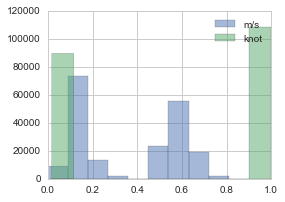

In [5]:
# Detect data stored in knot or m/s
## For data stored originally in knot, the data would cluster at 0.1 and 0.9
df['decimal'] = df.speed % 1 
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4,3))
knot_unit = True if len(df.query('decimal >= 0.2'))/len(df) > 0.3 else False

# Using unit in knot instead of m/s
if knot_unit:
    df['speed']=df['speed']*1.943845
    df['decimal'] = df.speed % 1 
    df.decimal.hist(alpha=0.5,label='knot')
    # need more elaboration, some is not near an integer
    df['speed']=df['speed'].apply(lambda x: int(round(x)))
    plt.legend()

print knot_unit

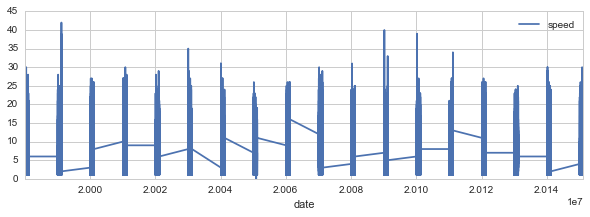

In [6]:
df['speed'].plot(legend=True,figsize=(10,3), grid=True)

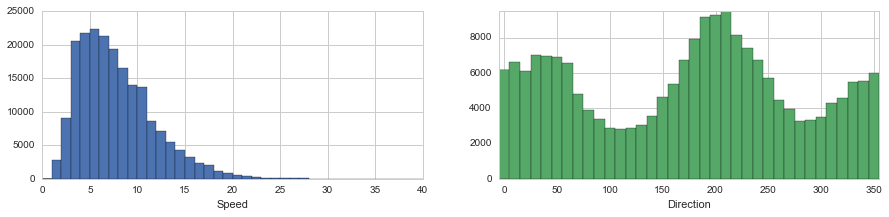

In [7]:
# Notice the gap of the distributions, so futher process needed, as below
plot_speed_and_angle_distribution(df.speed, df.dir)

## 1.3 Data Wrangling

### 1.3.1 Artefacts handling

#### 1.3.1.1 wrong direction record

In [8]:
display(df.query('dir % 10 >= 0.1'))
df = df.query('dir % 10 <= 0.1')

,date,HrMn,type,dir,speed,dir_windrose,decimal
date,,,,,,,
19980427,19980427,1130,FM-15,179,30,271,0.935213


#### 1.3.1.2 sudden increase in speed

,date,HrMn,type,dir,speed,dir_windrose,decimal,incre,incre_reverse
date,,,,,,,,,
19991226,19991226,800,FM-15,200,42,250,0.987052,3.0,18.0
20090210,20090210,300,AUTO,220,40,230,0.043207,4.0,1.0
19991226,19991226,700,FM-15,210,39,240,0.071285,13.0,-3.0
19991212,19991212,1000,FM-15,210,39,240,0.071285,11.0,6.0
20090210,20090210,400,AUTO,210,39,240,0.071285,-1.0,3.0
20100228,20100228,530,AUTO,220,39,230,0.071285,5.0,4.0
20100228,20100228,700,AUTO,220,38,230,0.904978,3.0,2.0
20100228,20100228,800,AUTO,210,36,240,0.961132,0.0,5.0
20100228,20100228,730,AUTO,220,36,230,0.961132,-2.0,0.0


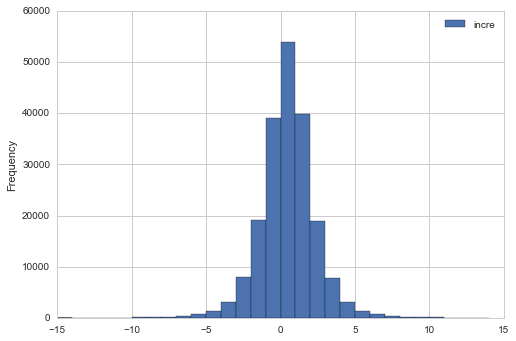

In [9]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True)

In [10]:
incre_threshold = 20 if knot_unit else 10
print 'sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )'))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

sudden increase number 1


After Simple Aretefacts Handling

In [11]:
# Check the max speed
df.sort_values(by='speed',ascending=False).head(10)

,date,HrMn,type,dir,speed,dir_windrose,decimal,incre,incre_reverse
date,,,,,,,,,
19991226,19991226,800,FM-15,200,42,250,0.987052,3.0,18.0
20090210,20090210,300,AUTO,220,40,230,0.043207,4.0,1.0
19991226,19991226,700,FM-15,210,39,240,0.071285,13.0,-3.0
20090210,20090210,400,AUTO,210,39,240,0.071285,-1.0,3.0
19991212,19991212,1000,FM-15,210,39,240,0.071285,11.0,6.0
20100228,20100228,530,AUTO,220,39,230,0.071285,5.0,4.0
20100228,20100228,700,AUTO,220,38,230,0.904978,3.0,2.0
20090210,20090210,500,FM-15,200,36,250,0.961132,-3.0,4.0
20100228,20100228,800,AUTO,210,36,240,0.961132,0.0,5.0


#### 1.3.1.3 re-distribute angle, for un-evenly sectored data
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [12]:
df['dir'].value_counts().sort_index()

0      6171
10     6594
20     6089
30     7024
40     6942
50     6921
60     6582
70     4780
80     3871
90     3380
100    2859
110    2846
120    2867
130    3049
140    3567
150    4651
160    5366
170    6733
180    7909
190    9177
200    9308
210    9484
220    8129
230    7391
240    6741
250    5730
260    4451
270    3971
280    3291
290    3303
300    3514
310    4292
320    4557
330    5497
340    5563
350    5980
Name: dir, dtype: int64

In [13]:
effective_coloumn = df['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()

if len(effective_coloumn) == 16:
    # For some dataset, the angle is not evenly distributed, so there is a need to redistribute
    original_angle = list(effective_coloumn.sort_index().index)
    redistributed_angle = linspace(0,360,num=17)[:-1]
    df['dir'].replace(to_replace=original_angle, value=redistributed_angle, inplace=True)
    display(df['dir'].value_counts().sort_index())

SECTOR_LENGTH = 360/len(effective_coloumn)
print len(effective_coloumn), SECTOR_LENGTH

36 10.0


### 1.3.2 Sampling Type Selection

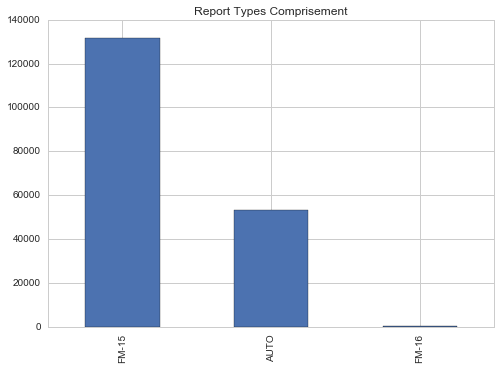

In [14]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement')

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

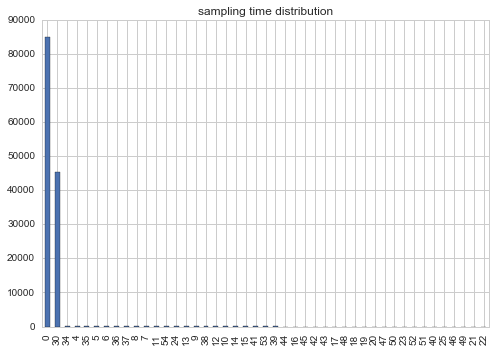

In [15]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_time.value_counts().plot(
    kind = 'bar', title = 'sampling time distribution')

sampling_time_most_used = sample_time.value_counts().argmax()
df = df.query("sample_time==@sampling_time_most_used")
df.drop(['sample_time'], 1,inplace=True)

In [16]:
df['HrMn'].value_counts().sort_index()

0       3900
100     1832
200     1833
300     3796
400     4008
500     4353
600     4350
700     4182
800     4157
900     4229
1000    4206
1100    4217
1200    4295
1300    4209
1400    4197
1500    4318
1600    4263
1700    4265
1800    4328
1900    4036
2000    3956
2100    4166
2200    3793
2300    3687
Name: HrMn, dtype: int64

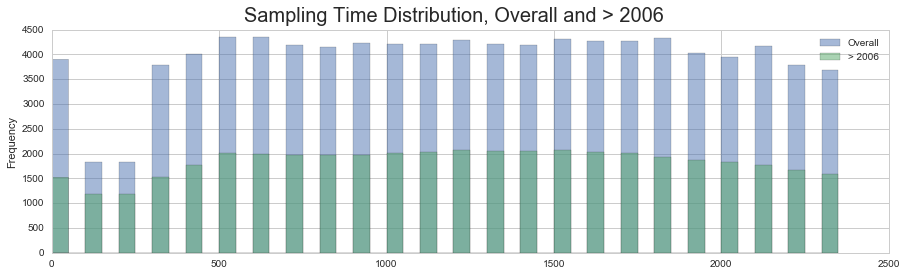

In [17]:
MID_YEAR = int(((min(df.date)+max(df.date))/2 )/10000)
# Ensure data sampled equally
bins=arange(min(df.HrMn), max(df.HrMn) + 100, 50)

df['HrMn'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='Overall')

df.query('date > @MID_YEAR * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='> %s' %  MID_YEAR )

plt.suptitle('Sampling Time Distribution, Overall and > %s ' %  MID_YEAR, fontsize = 20)
plt.legend()

### 1.3.4 Re-distribute Direction and Speed
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [18]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

def randomize_angle(df, sector_length = 10):
    if DIR_REDISTRIBUTE == 'even':
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(-sector_length/2,sector_length/2)))
    else:
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(0,sector_length)))

    bins=arange(0, 360+10, 5)
    df['dir'].hist(bins=bins, alpha=0.5)
    bins=arange(0, 360+10, 1)
    df['dir_ran'].hist(bins=bins, alpha=0.5,figsize=(15, 4))
    
    df['dir']=df['dir_ran']
    df.drop(['dir_ran'], 1,inplace=True)
    return df

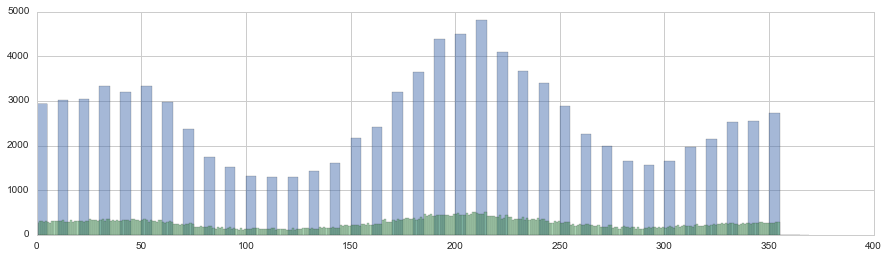

In [19]:
# Randomize the angle degree, to form a better KDE estimation
df = randomize_angle(df, SECTOR_LENGTH)

In [20]:
def randomize_speed(df):
    # Round down speed, need more caution
    if len(df.query('speed < 1')) > 200:
        # if has zero data
        df['speed_ran'] = df['speed'].apply(lambda x: (x + np.random.uniform(0,1)))
    else:
        # if lack zero
        df['speed_ran'] = df['speed'].apply(lambda x: (x + np.random.uniform(-1,0)) if x > 0 else x)

    max_speed = df.speed.max()
    df['speed'].hist(bins=arange(0, max_speed), alpha=0.5)
    df['speed_ran'].hist(bins=arange(0, max_speed, 0.5), alpha=0.5,figsize=(15, 4))
    
    df['speed']=df['speed_ran']
    df.drop(['speed_ran'], 1,inplace=True)
    return df

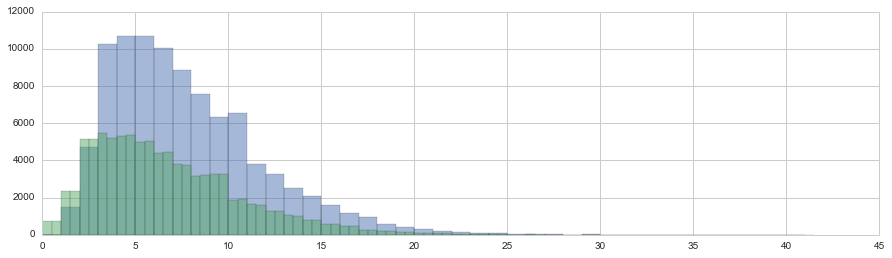

In [21]:
# Each original cell is split between the value, # so the peak is shift left
# e.g. 2 -> (1.5,2), (2,2.5); or 3 -> (2,3)
df = randomize_speed(df)

### 1.3.5 Generate (x,y) from (speed,dir)

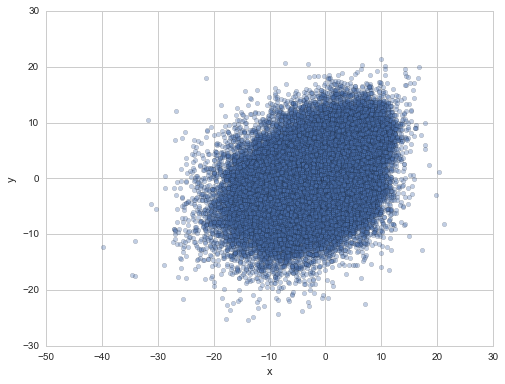

In [22]:
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
ax.set_aspect('equal')
df.plot(kind='scatter', x='x', y='y', alpha=0.35, ax=ax)

## 1.4 Time Shift Comparison

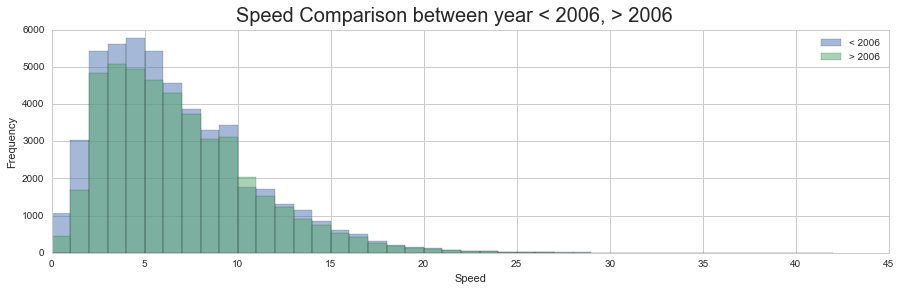

In [23]:
# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, max(df.speed) + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='> %s' % MID_YEAR)

plt.xlabel("Speed")
plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 20)
plt.legend()

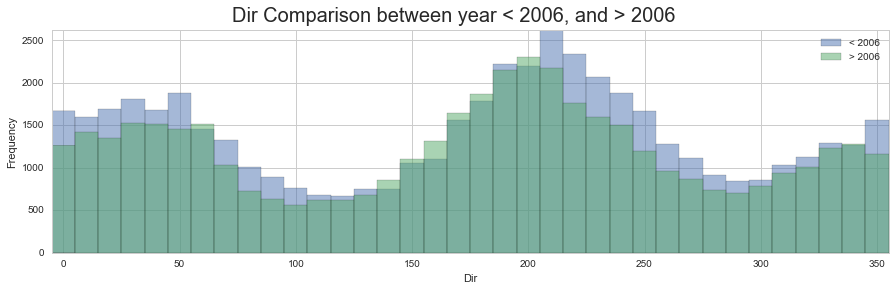

In [24]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.xlabel("Dir")
plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 20)
plt.axis('tight')
plt.legend()

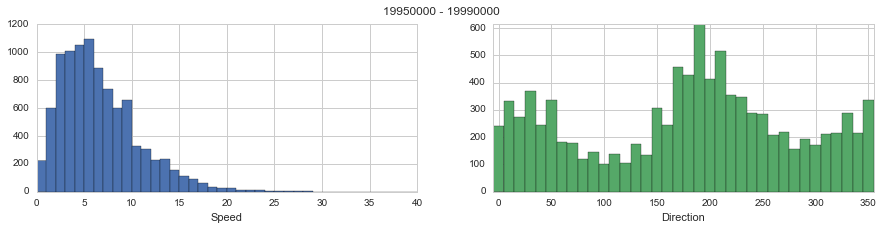

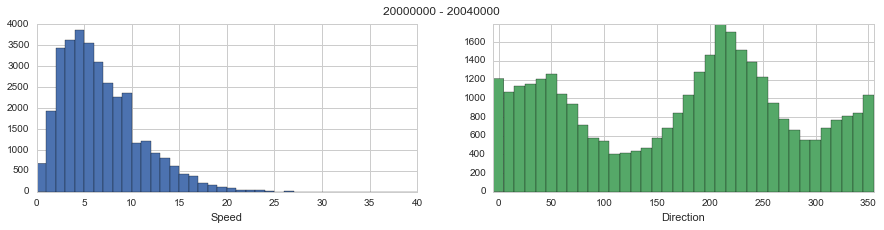

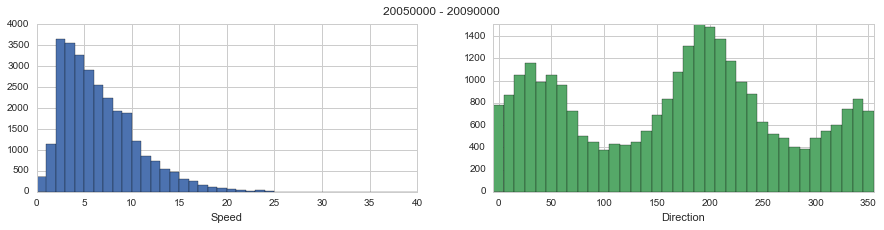

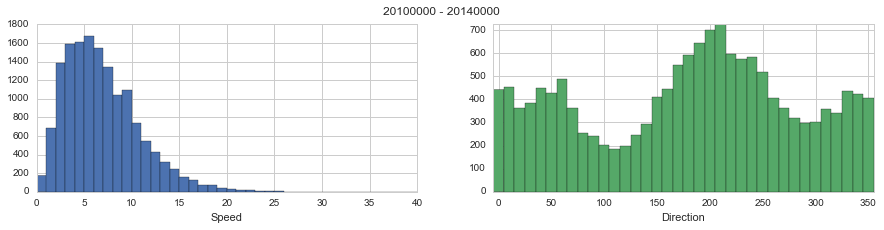

In [25]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
def check_time_shift(df):
    for start_time in xrange(19850000, 20150000, 50000):
        end_time = start_time + 50000 
        sub_df = df.query('(date >= @start_time) & (date < @end_time)')
        if len(sub_df) > 0 :
            title = '%s - %s' %(start_time, end_time-10000)
            plot_speed_and_angle_distribution(sub_df.speed, sub_df.dir, title)
        
check_time_shift(df)

## 1.5 Re-select data, and overview of the clean dataset

In [26]:
## Summery of the data selection
print 'incre_threshold for artefact detect:', incre_threshold
print 'Report type used:', report_type_most_used
print 'Sampling time used:', sampling_time_most_used

df_all_years = df
df = df.query('(date >= 20100000) & (date < 20150000)')
df.describe()

incre_threshold for artefact detect: 20
Report type used: FM-15
Sampling time used: 0


,date,HrMn,dir,speed,dir_windrose,decimal,incre,incre_reverse,x,y
count,1.496900e+04,14969.000000,14969.000000,14969.000000,14969.000000,14969.000000,14969.000000,14969.000000,14969.000000,14969.000000
mean,2.013340e+07,1166.330416,180.054936,6.880994,177.059924,0.540681,0.007482,0.021979,-1.260014,-0.700106
std,1.044669e+04,684.517572,100.740393,3.910266,95.684581,0.448133,1.910671,1.882856,5.900430,5.074290
min,2.010010e+07,0.000000,-4.973191,0.002087,0.000000,0.019445,-17.000000,-16.000000,-26.314393,-25.145677
25%,2.013072e+07,600.000000,90.171175,3.936305,90.000000,0.053997,-1.000000,-1.000000,-5.171945,-3.906430
50%,2.014012e+07,1200.000000,192.811710,6.236855,190.000000,0.913609,0.000000,0.000000,-0.783213,-0.731965
75%,2.014070e+07,1800.000000,253.473303,9.157144,260.000000,0.943845,1.000000,1.000000,3.229197,2.420155
max,2.014123e+07,2300.000000,354.984739,31.654758,350.000000,0.997842,16.000000,17.000000,21.339539,18.378235


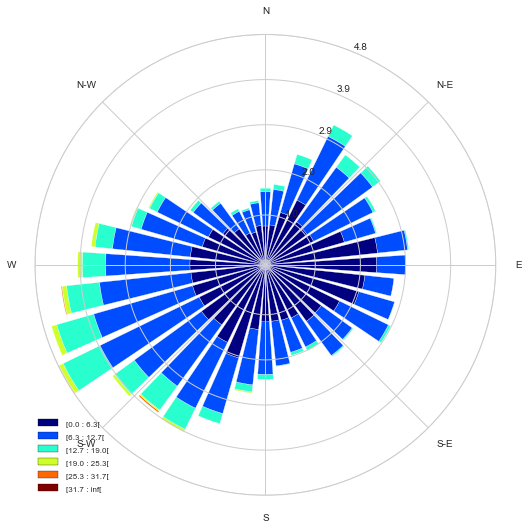

In [27]:
# 90 degree is in east
ax = WindroseAxes.from_ax()
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36)
ax.set_legend()

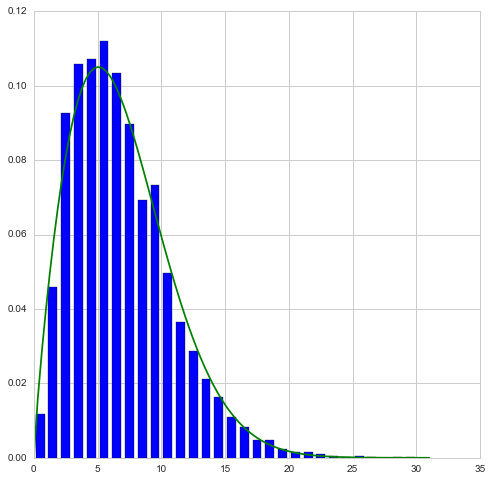

In [28]:
ax, _params = WindAxes.from_ax().pdf(df.speed, 
                                     bins=arange(0, max(df.speed)))
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)

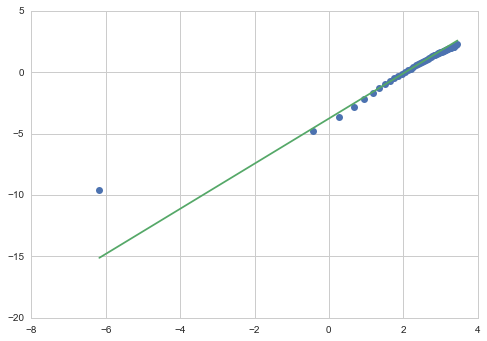

In [29]:
sample = df.speed
ecdf = sm.distributions.ECDF(sample)

x = linspace(min(sample), max(sample))
y = ecdf(x)
plt.plot(log(x), log(-log(1-y)),'o')

w_scale, c_shape = weibull_params[1], weibull_params[3]
qz=exp(-(x/c_shape)**w_scale)
plt.plot(log(x), log(-log(qz)),'-')

# 2. Create input data, i.e. speed_set

In [30]:
# speed_set = array(zip(-df.x, -df.y)) # Adjust the direction to match for Cook's paper
SPEED_SET = array(zip(df.x, df.y))
max_speed = df.speed.max()
NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7

In [31]:
FITTING_RANGE = []
fit_limit = ceil(df['speed'].quantile(.95))
plot_limit = ceil(df['speed'].quantile(.975))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)
    
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])
        
print fitting_axis_range

[-15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.
   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.]


# 3. Kernel Density Estimation

In [32]:
sample = SPEED_SET

In [33]:
# The bandwidth value sometimes would be too radical
from sklearn.grid_search import GridSearchCV

if knot_unit:
    bandwidth_range = arange(0.5,2,0.2)
else:
    bandwidth_range = arange(0.4,1,0.1)

grid = GridSearchCV(neighbors.KernelDensity(),
                    {'bandwidth': bandwidth_range},
                    n_jobs=-1, cv=4) 
grid.fit(sample)
bandwidth = grid.best_params_['bandwidth']

In [34]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH 

kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print 'bandwidth:', bandwidth, len(kde_result)
print kde_result[:5]

bandwidth: 1.5 961
[  2.41799678e-05   4.49479167e-05   7.00157749e-05   9.58079569e-05
   1.28835744e-04]


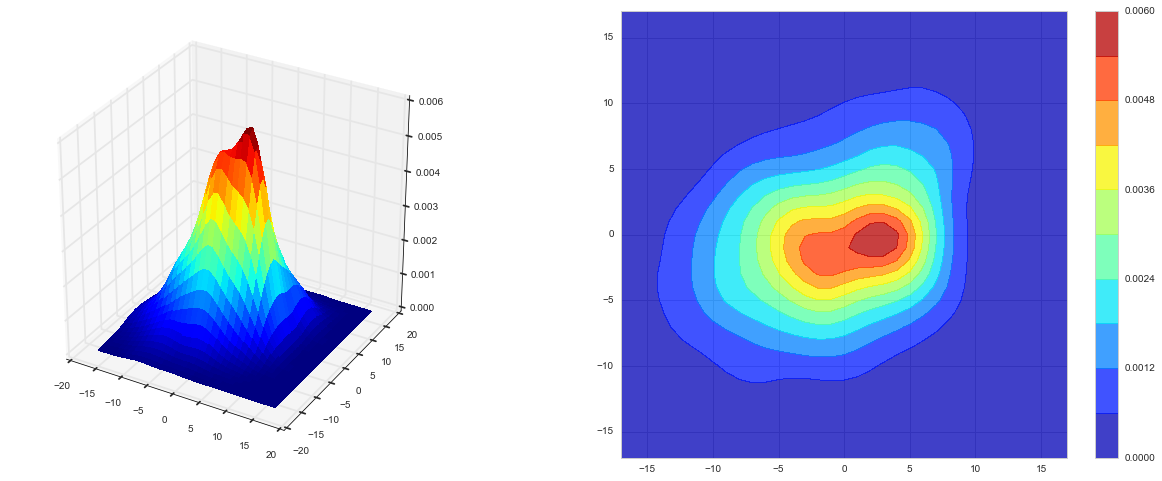

In [35]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,2,2)
plot_2d_prob_density(X,Y,kde_Z,ax2)

In [36]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM Estimation, using EM algo

In [37]:
sample= SPEED_SET
clf = mixture.GMM(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print clf.converged_

True


In [38]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)  

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.375162,1.082806,-2.214505,4.153281,3.867990,0.148979
2,0.337229,-6.344965,-1.802353,5.340632,5.334000,0.132220
3,0.287610,1.646200,2.567701,4.379261,4.642472,0.364177


GMM Plot Result
0.375161506791 [[ 1.08280587 -2.21450482]] [ 3.66780155  4.3310878 ] -57.7757251631
0.337228695751 [[-6.34496549 -1.80235344]] [ 4.97194451  5.67923182] -45.2691866386
0.287609797458 [[ 1.64620038  2.56770118]] [ 3.58701908  5.27861435] 139.55526029


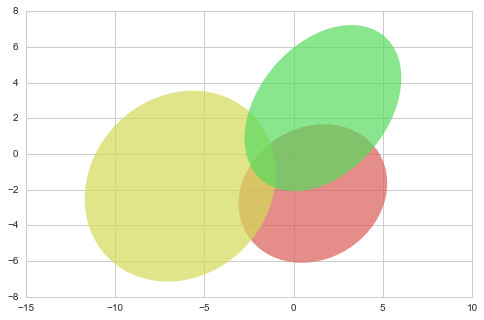

In [39]:
plot_gmm_ellipses(gmm_em_result)

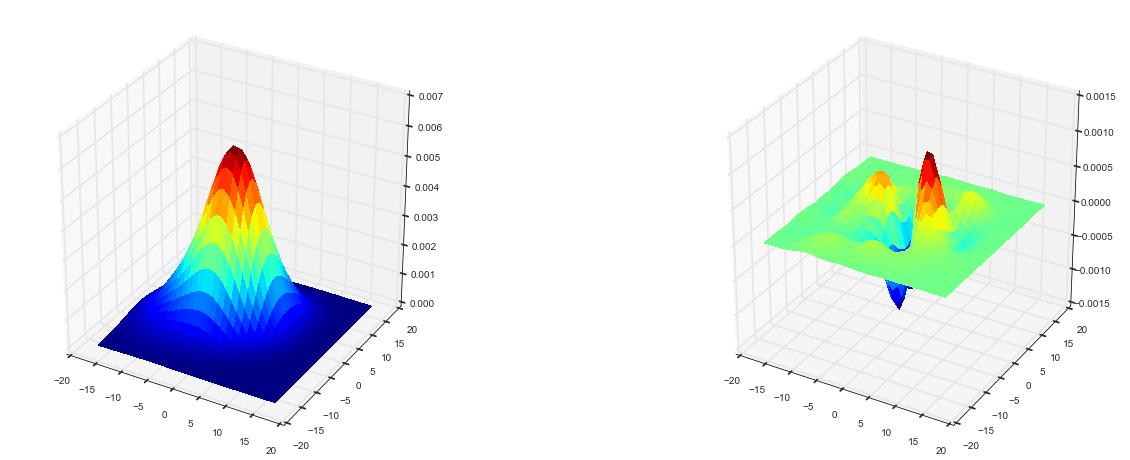

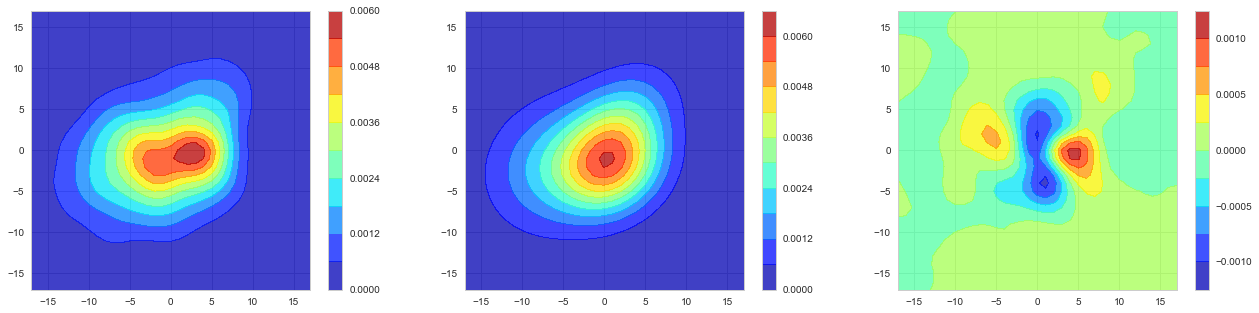

In [40]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)[0]))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points)[0])
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2,projection = '3d')
plot_3d_prob_density(X,Y,residual_Z,ax2)

fig = plt.figure(figsize=(22,5))
ax1 = fig.add_subplot(1,3,1)
plot_2d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,3,2)
plot_2d_prob_density(X,Y,pdf_Z,ax2)
ax3 = fig.add_subplot(1,3,3)
plot_2d_prob_density(X,Y,residual_Z,ax3)

## GMM, EM VS. KDE

In [41]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points)[0])
# put into Pandas to make it looks better
pretty_pd_display([goodness_of_fit_summary(gmm_pdf_result, kde_result)])

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.029153,0.032034,5.945392e-08,0.040952,0.239393,0.966441


# 5. Least Square Prob Estimation

In [42]:
sample = SPEED_SET
points = FITTING_RANGE

In [43]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
        # {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
        # {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*int(len(x0)/6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points,FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -18.372446539164372
     jac: array([  2.18648624e+00,  -2.38418579e-07,  -2.38418579e-07,
        -4.76837158e-07,  -7.15255737e-07,  -9.53674316e-07,
         2.18647408e+00,  -7.15255737e-07,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -1.19209290e-06,
         2.18647289e+00,   4.76837158e-07,   0.00000000e+00,
         2.38418579e-07,  -2.38418579e-07,   1.43051147e-06,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 958
     nit: 47
    njev: 47
  status: 0
 success: True
       x: array([  1.20766923e-01,   1.66813547e+00,  -9.34164609e-01,
         3.72414158e+00,   2.37364409e+00,   2.41421149e-03,
         1.78120218e-01,   4.59815787e+00,   2.36114450e+00,
         2.72885814e+00,   5.67496029e+00,   2.14476535e-01,
         7.01112860e-01,  -2.99441134e+00,  -1.35186358e+00,
         5.67352554e+00,   5.26299468e+00,   9.31909540e-02])

## 5.1 GMM Result

In [44]:
# gmm = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)

pretty_print_gmm(gmm)

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.701113,-2.994411,-1.351864,5.673526,5.262995,0.093191
2,0.178120,4.598158,2.361145,2.728858,5.674960,0.214477
3,0.120767,1.668135,-0.934165,3.724142,2.373644,0.002414


GMM Plot Result
0.701112859868 [[-2.99441134 -1.35186358]] [ 5.13504732  5.78958497] -64.447307771
0.178120217539 [[ 4.59815787  2.3611445 ]] [ 2.64741998  5.71340603] 172.490484949
0.120766922593 [[ 1.66813547 -0.93416461]] [ 2.37363244  3.724149  ] -89.851519336


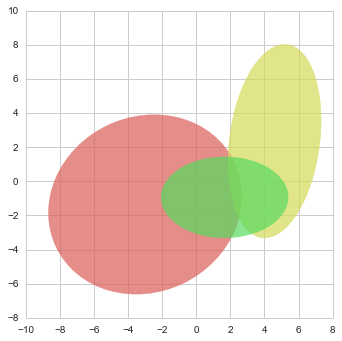

In [45]:
plot_gmm_ellipses(gmm)

## 5.2 Goodness-of-fit statistics

In [46]:
pretty_pd_display([goodness_of_fit_summary(gmm_pdf_result, kde_result)])

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.01168,0.008037,1.049416e-08,0.017205,0.100576,0.994077


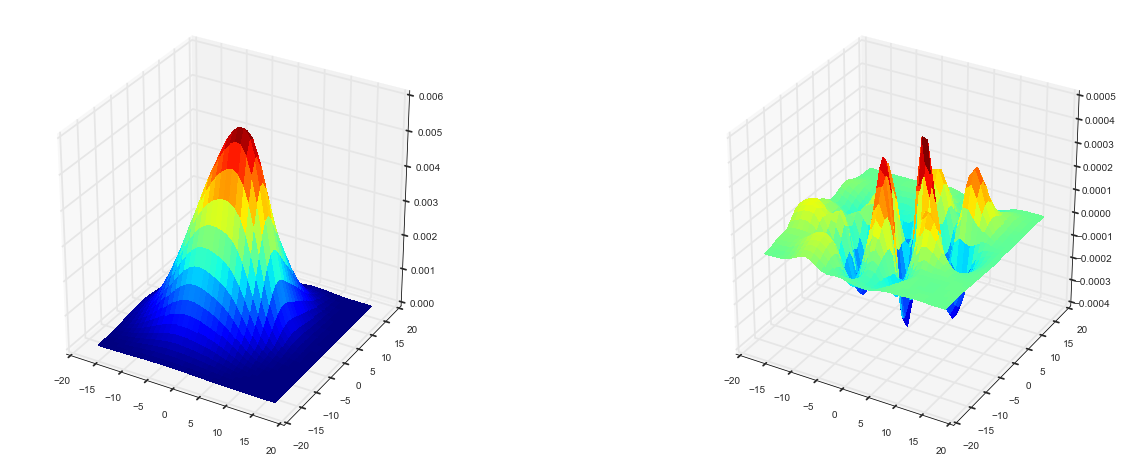

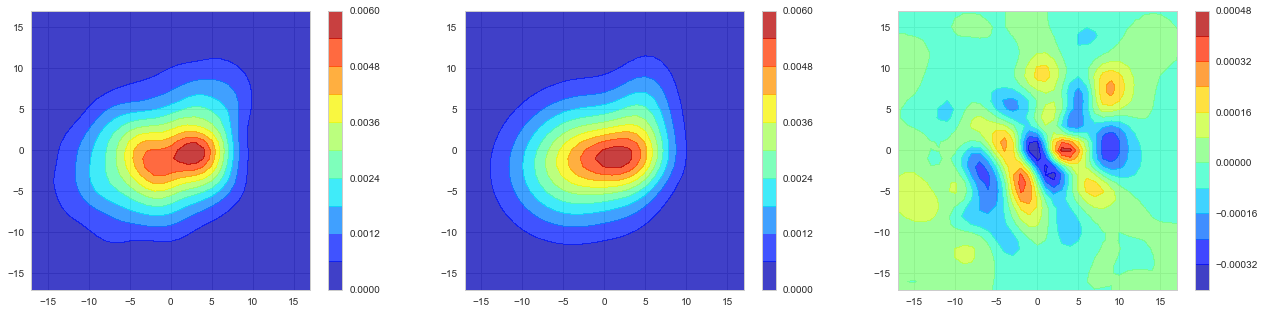

In [47]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2,projection = '3d')
plot_3d_prob_density(X,Y,residual_Z,ax2)

fig = plt.figure(figsize=(22,5))
ax1 = fig.add_subplot(1,3,1)
plot_2d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,3,2)
plot_2d_prob_density(X,Y,pdf_Z,ax2)
ax3 = fig.add_subplot(1,3,3)
plot_2d_prob_density(X,Y,residual_Z,ax3)

In [48]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

x_vals_OEN3_LMSE  = arange(0, max_speed)
y_vals_OEN3_LMSE =[integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x_vals_OEN3_LMSE ]

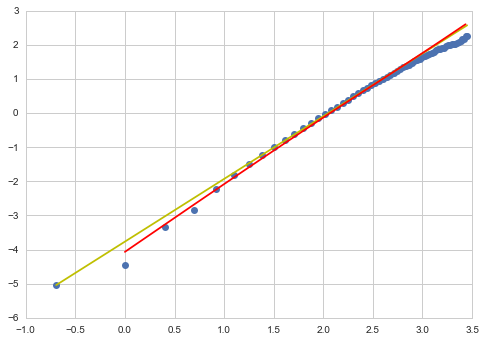

In [49]:
x = arange(0, max_speed, 0.5)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(df.speed)
y = ecdf(x)
plt.plot(log(x), log(-log(1-y)),'o')

# 2. Weibull distribution
w_scale, c_shape = weibull_params[1], weibull_params[3]
qz=exp(-(x/c_shape)**w_scale)
plt.plot(log(x), log(-log(qz)),'-', color = 'y')

# 3. OEN3 distribution
x, y_ = x_vals_OEN3_LMSE, y_vals_OEN3_LMSE
y = array(zip(*y_)[0])
plt.plot(log(x), log(-log(1-y)),'-', color = 'r')

plt.show()

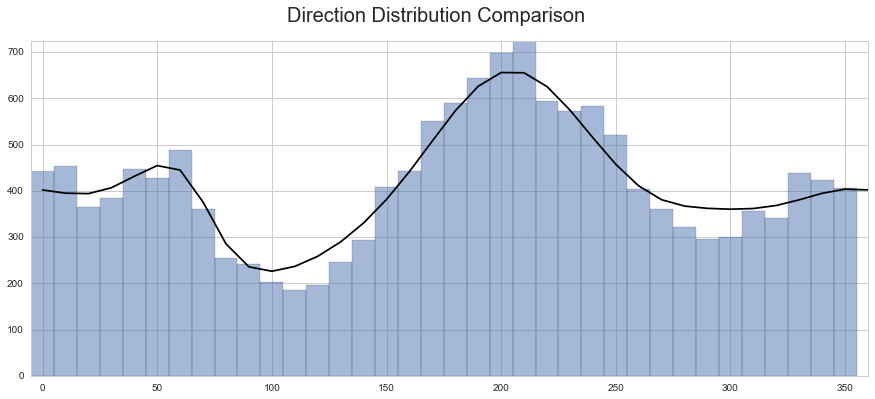

In [50]:
# Calculate Angle Distribution
x_vals = linspace(0,2*pi, num=36+1)
y_vals_ =[integrate.nquad(f, [[0, inf],[x_val-pi/36, x_val+pi/36]]) for x_val in x_vals]

# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y_vals = array(zip(*y_vals_)[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5,figsize=(15, 6))

plt.plot(x_vals/pi*180, y_vals,'-', color='black')
plt.suptitle('Direction Distribution Comparison', fontsize = 20)
plt.axis('tight')
plt.show()

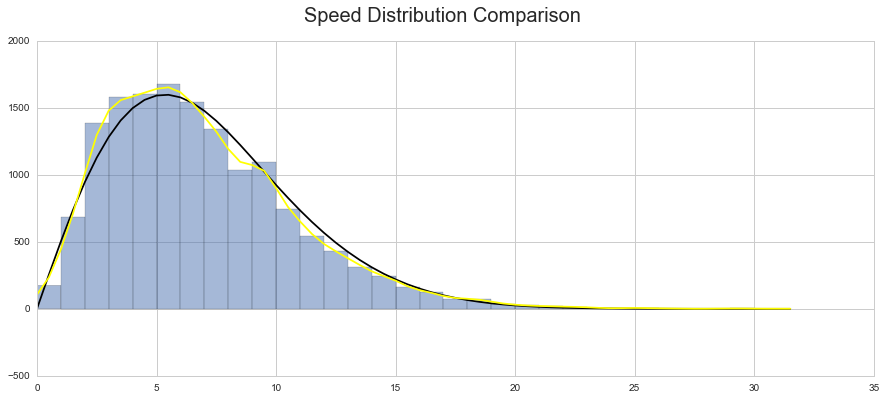

In [51]:
# Calculate Speed Distribution
# 1. GMM Model
x_vals = arange(0, max_speed, 0.5)
y_vals_ =[integrate.nquad(f, [[x_val-0.1, x_val+0.1],[0, 2*pi]]) for x_val in x_vals]
y_vals = array(zip(*y_vals_)[0])*len(df.speed)/0.2
plt.plot(x_vals, y_vals,'-', color='black')

# 2. Observation
df['speed'].hist(bins=arange(0, max_speed), alpha=0.5,figsize=(15, 6))

# 3. 1d KDE
sample = array(df.speed).reshape(-1, 1)
kde_temp = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(kde_temp.score_samples(x_val))*len(sample) for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow')

plt.suptitle('Speed Distribution Comparison', fontsize = 20)
plt.show()

## 5.3 Sectoral Comaprison

In [52]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    hist_y_axis = [0, max_speed, 0, max_count]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        direction_prob = integrate.nquad(f, 
                                         [[0, inf],
                                          [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        
        # 1. Count Comparison
        # 1.1. Data Histogram
        fig = plt.figure(figsize=(22,4))
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5)
        plt.axis(hist_y_axis)
        
        # 1.2. Model Distribution
        x_vals = linspace(0, sub_max_speed, 20)
        y_vals_ =[integrate.nquad(f, 
                  [[x_val-0.1, x_val+0.1],
                   [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                  for x_val in x_vals]
        y_vals = array(zip(*y_vals_)[0])/direction_prob[0] * len(sub_df.speed)/0.2
        plt.plot(x_vals, y_vals,'-', color='black')
        
        # 2. CDF Comaprison
        x = linspace(0, sub_max_speed, 20)
        # 2.1. Data's empirical distribution
        ecdf = sm.distributions.ECDF(sub_df.speed)
        y_cdf = ecdf(x)
        
        # 2.2. Model
        y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        y_gmm = array(zip(*y_)[0])/direction_prob[0]
                
        # 2.3.1. Plot in ordinary axis
        ax3 = fig.add_subplot(1,3,2)
        plt.plot(x, y_cdf,'o')
        plt.plot(x, y_gmm,'-', color = 'r')
        
        # 2.3.2. Weibull plot
        ax4 = fig.add_subplot(1,3,3)
        plt.plot(log(x), log(-log(1-y_cdf)),'o')
        plt.plot(log(x), log(-log(1-y_gmm)),'-', color = 'r')
        
        plt.suptitle('%s (%s - %s) Degree Speed Distribution Comparison' % (angle, start_angle, end_angle), 
                     fontsize = 15)
        plt.show()
        
        diff = abs(y_cdf - y_gmm)
        max_diff_array.append([angle, diff.max(), x[diff.argmax()]])
        print 'data size:', len(sub_df)
        print 'max diff:', diff.max(), ', speed value:', x[diff.argmax()], 'y gmm', y_gmm[diff.argmax()],
    return max_diff_array

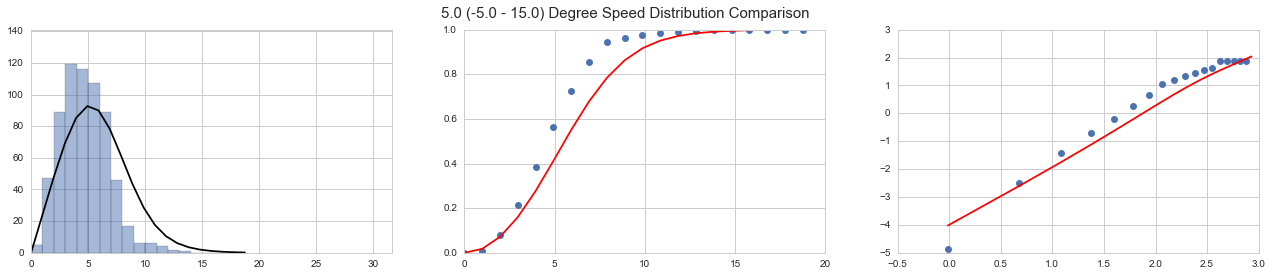

data size: 655
max diff: 0.178238442602 , speed value: 6.9060277437 y gmm 0.678250107016

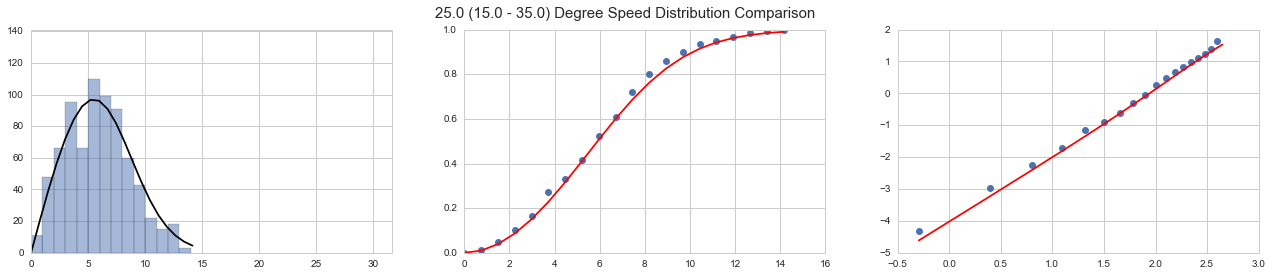

 data size: 749
max diff: 0.042870395494 , speed value: 3.72370480159 y gmm 0.228157641889

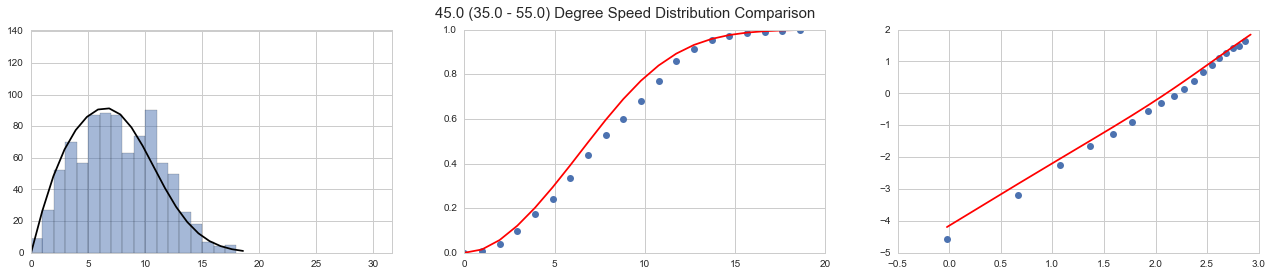

 data size: 874
max diff: 0.0901963846235 , speed value: 9.78125233419 y gmm 0.77097441666

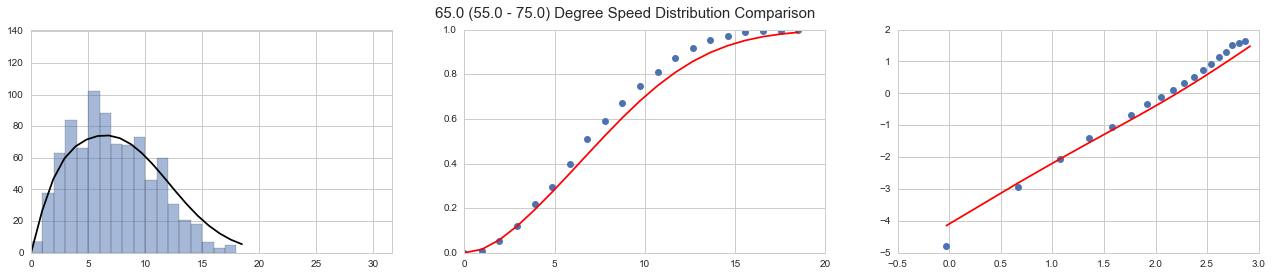

 data size: 850
max diff: 0.0678893728764 , speed value: 6.81067563716 y gmm 0.440345921241

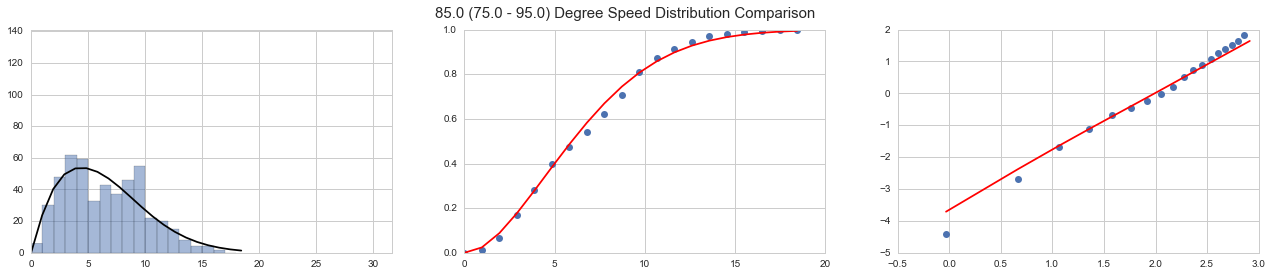

 data size: 495
max diff: 0.0495216999539 , speed value: 7.7588683424 y gmm 0.669723720156

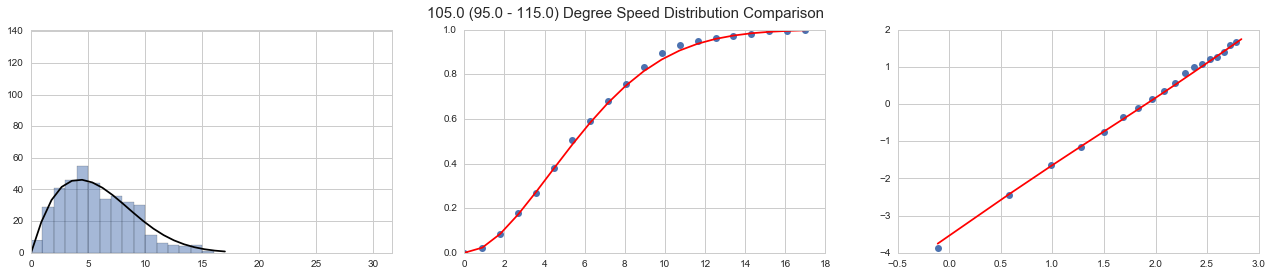

 data size: 389
max diff: 0.0311431578737 , speed value: 9.83943956875 y gmm 0.86602907863

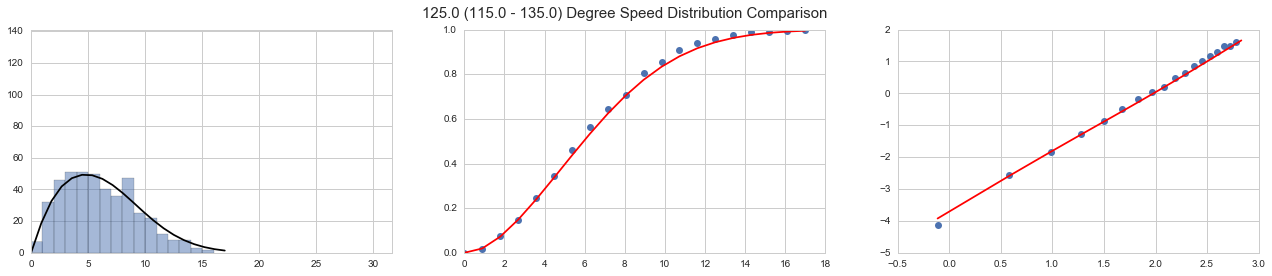

 data size: 443
max diff: 0.0292353460177 , speed value: 6.25622291834 y gmm 0.532841403418

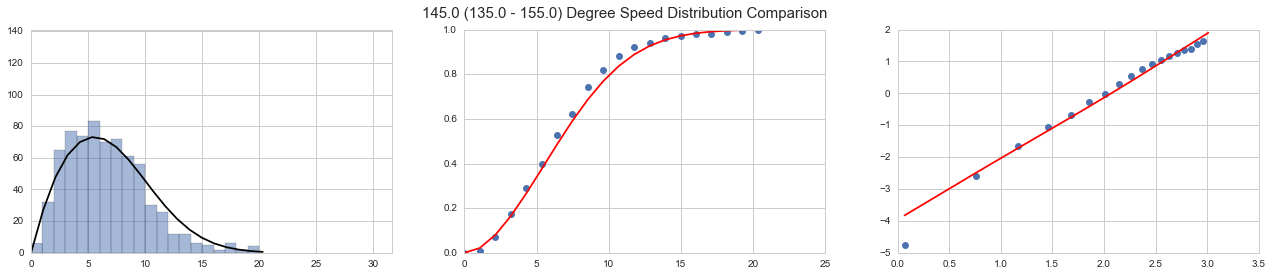

 data size: 702
max diff: 0.0551363546511 , speed value: 8.5528509006 y gmm 0.687028887514

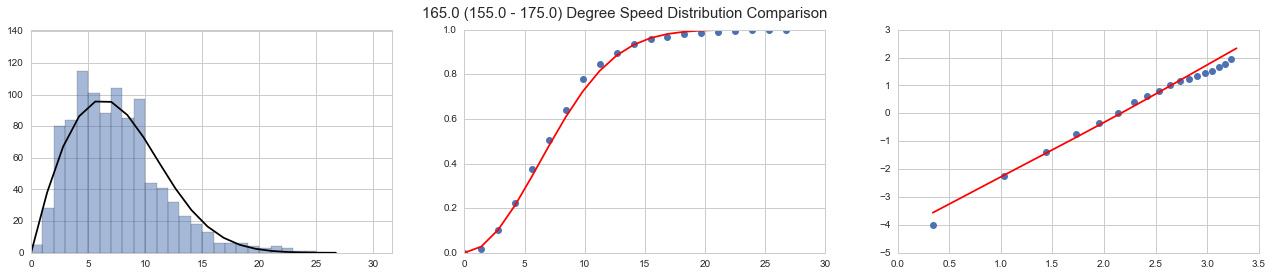

 data size: 993
max diff: 0.0549154457944 , speed value: 9.84420332162 y gmm 0.723533698214

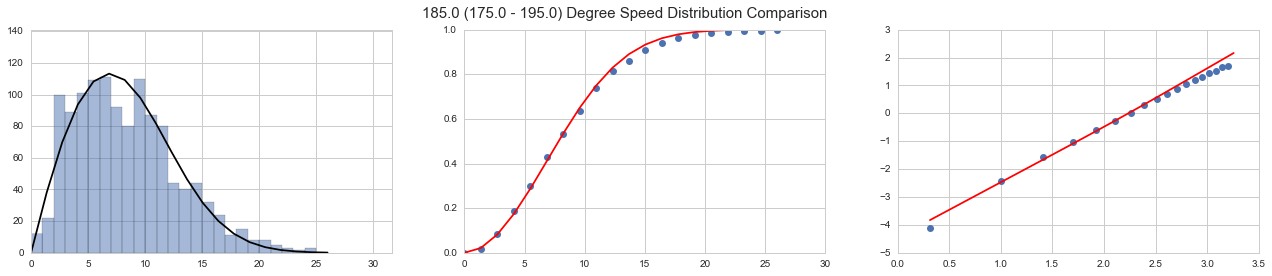

 data size: 1235
max diff: 0.028699394059 , speed value: 13.6796632527 y gmm 0.890237855597

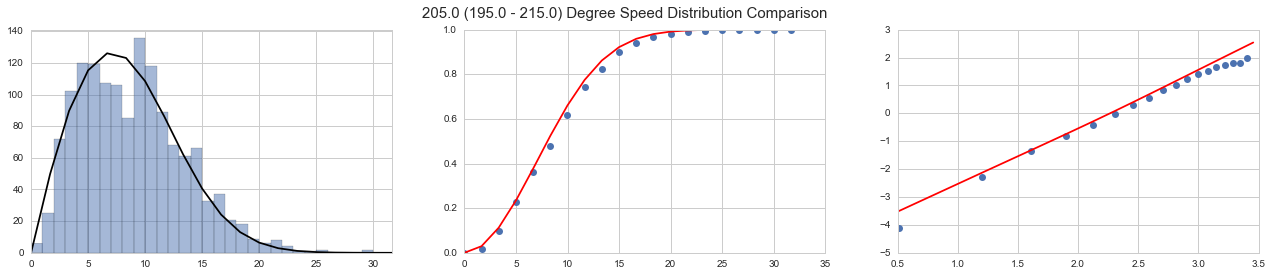

 data size: 1423
max diff: 0.0432939853154 , speed value: 9.99623929203 y gmm 0.660300309982

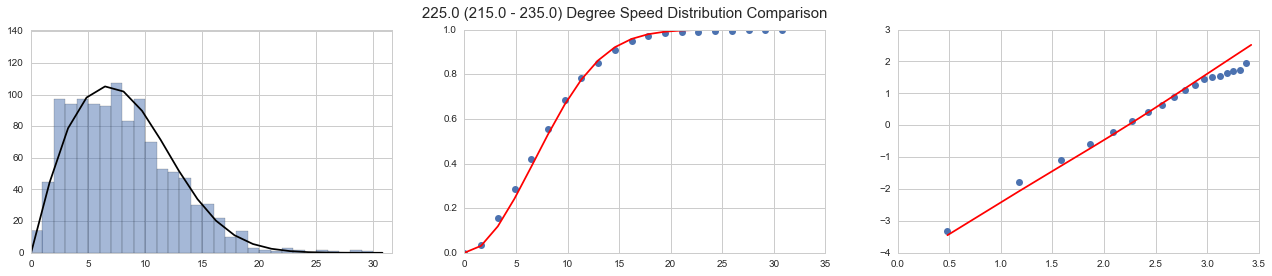

 data size: 1167
max diff: 0.0416022464742 , speed value: 4.86358784365 y gmm 0.242887899199

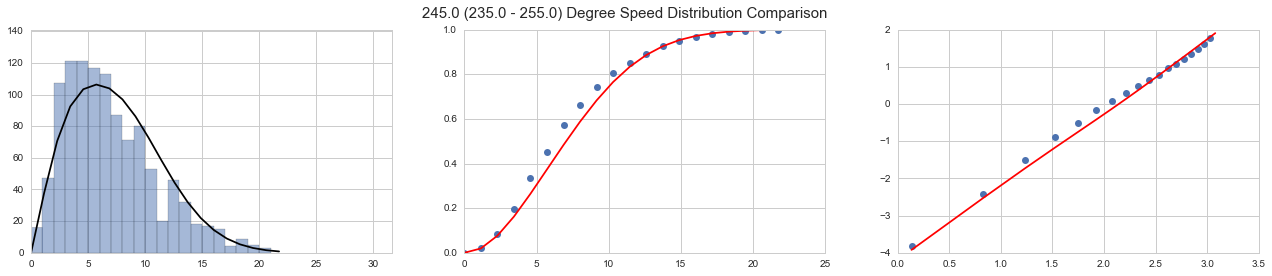

 data size: 1104
max diff: 0.0894709780124 , speed value: 6.86595408013 y gmm 0.482992790104

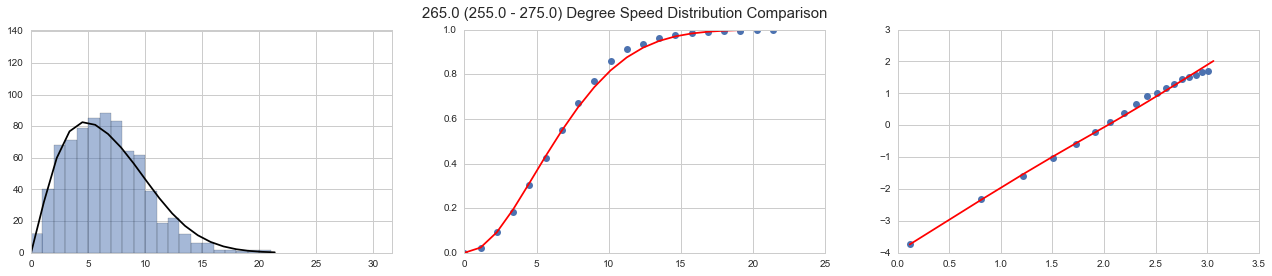

 data size: 766
max diff: 0.0407543538307 , speed value: 10.1207477662 y gmm 0.816947996039

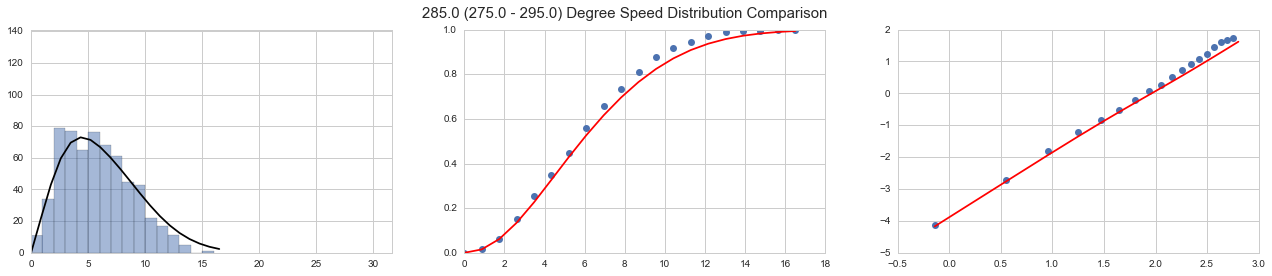

 data size: 617
max diff: 0.0516564267747 , speed value: 9.55268103148 y gmm 0.823546166418

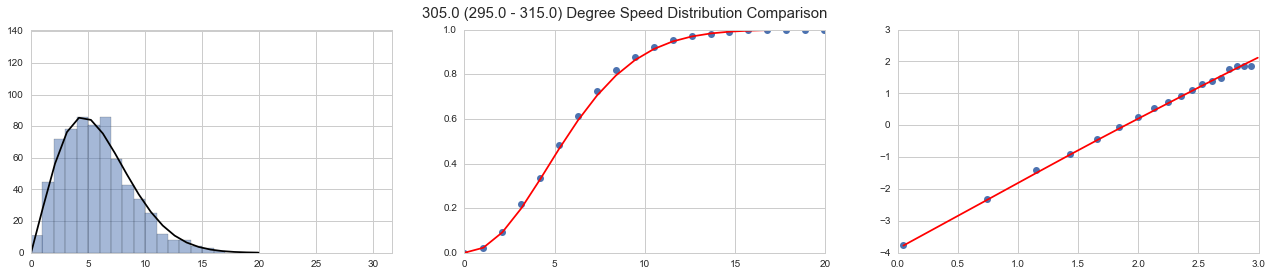

 data size: 657
max diff: 0.0263311503807 , speed value: 8.39244687182 y gmm 0.794064587823

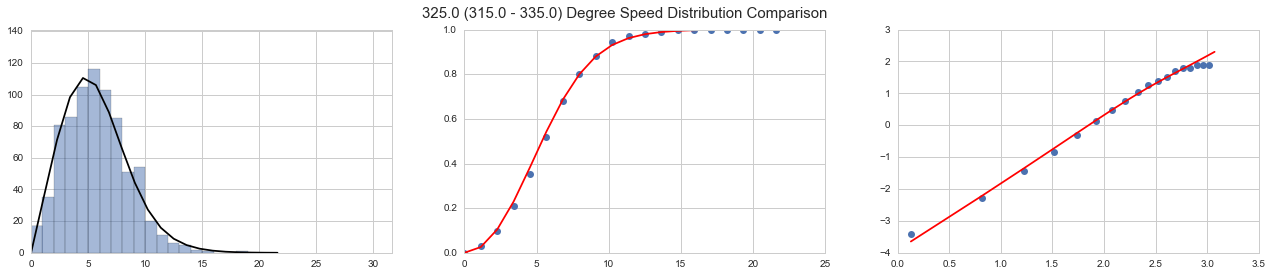

 data size: 780
max diff: 0.0285842378381 , speed value: 4.54760081951 y gmm 0.383712442966

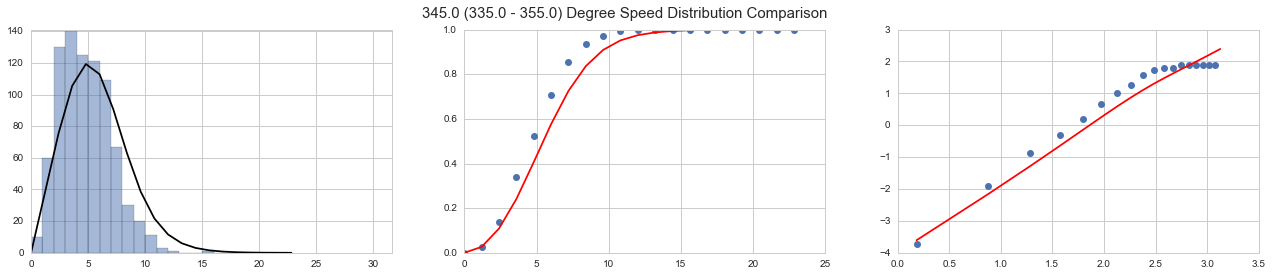

 data size: 830
max diff: 0.130784077516 , speed value: 6.00607672271 y gmm 0.576444838146


In [53]:
if len(effective_coloumn) == 16:
    max_diff_array = model_data_comparison(df, SECTOR_LENGTH, 22.5)
else: 
    max_diff_array = model_data_comparison(df, SECTOR_LENGTH, 20)

### 5.3.1 Variability over the years

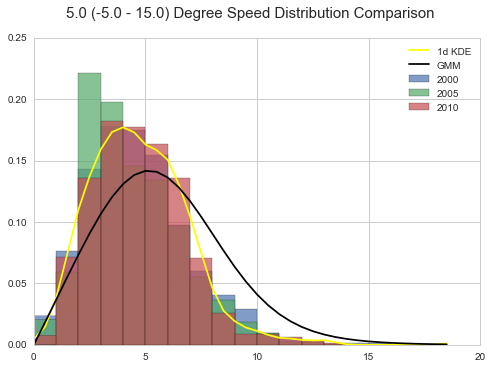

In [54]:
max_diff_element = max(max_diff_array, key=lambda x: x[1])
angle =  max_diff_angle = max_diff_element[0]
incre = 20

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, max_speed = select_df_by_angle(df, start_angle, end_angle)

x_vals = arange(0, max_speed, 0.5)

# 1. 1d KDE 
sample = array(sub_df.speed).reshape(-1, 1)
sub_kde = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(sub_kde.score_samples(x_val))
          for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow', label = '1d KDE')

# 2. GMM
y_vals_ =[integrate.nquad(f, [[x_val-0.1, x_val+0.1],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_val in x_vals]
direction_prob = integrate.nquad(f, [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_vals = array(zip(*y_vals_)[0])/direction_prob[0] /0.2
plt.plot(x_vals, y_vals,'-', color='black', label = 'GMM')

for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, _ = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years) > 0 :
        df_other_years_at_angle['speed'].hist(bins=arange(0, max_speed), 
                                              normed=True,alpha=0.7,
                                              label = str(int(start_time/10000)))

plt.suptitle('%s (%s - %s) Degree Speed Distribution Comparison' % (angle, start_angle, end_angle), 
             fontsize = 15)
plt.legend()
plt.show()

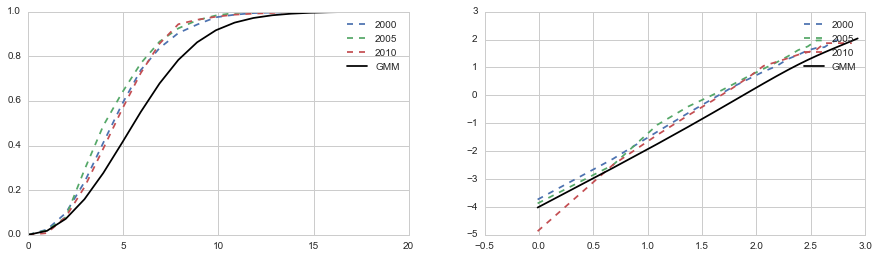

In [55]:
fig = plt.figure(figsize=(15,4))

x = linspace(0, max_speed, 20)
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, _ = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        sample = df_other_years_at_angle.speed
        ecdf = sm.distributions.ECDF(sample)
        y_cdf = ecdf(x)

        ax1 = fig.add_subplot(1,2,1) 
        plt.plot(x, y_cdf,'--', label = str(int(start_time/10000)))

        ax3 = fig.add_subplot(1,2,2) 
        plt.plot(log(x), log(-log(1-y_cdf)),'--', label = str(int(start_time/10000)))
       
y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
direction_prob = integrate.nquad(f, [[0, inf],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_)[0])/direction_prob[0]

ax1 = fig.add_subplot(1,2,1) 
plt.plot(x, y_gmm,'-', color = 'black', label = 'GMM')
plt.legend()

ax3 = fig.add_subplot(1,2,2) 
plt.plot(log(x), log(-log(1-y_gmm)),'-', color = 'black',label = 'GMM')
plt.legend()

### 5.3.2 Bootstrap, to see the variability of each sector

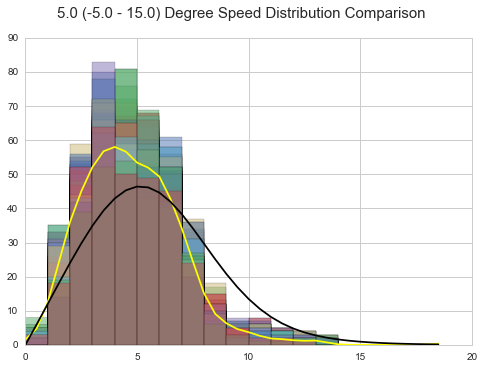

In [56]:
FRACTION = 0.5 

x_vals = arange(0, max_speed, 0.5)

# 1. 1d KDE 
sample = array(sub_df.speed).reshape(-1, 1)
sub_kde = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(sub_kde.score_samples(x_val))*len(sub_df.speed)*FRACTION
          for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow')

#2. GMM
y_vals_ =[integrate.nquad(f, [[x_val-0.1, x_val+0.1],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_val in x_vals]
direction_prob = integrate.nquad(f, [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_vals = array(zip(*y_vals_)[0])/direction_prob[0]/0.2 *len(sub_df.speed)*FRACTION
plt.plot(x_vals, y_vals,'-', color='black')

bins = arange(0, max_speed, 1)
for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    sub_df_resampled['speed'].hist(bins=bins, alpha=0.5)

plt.suptitle('%s (%s - %s) Degree Speed Distribution Comparison' % (angle, start_angle, end_angle), 
             fontsize = 15)

0.168793647903 5.91945235174 0.550718547219


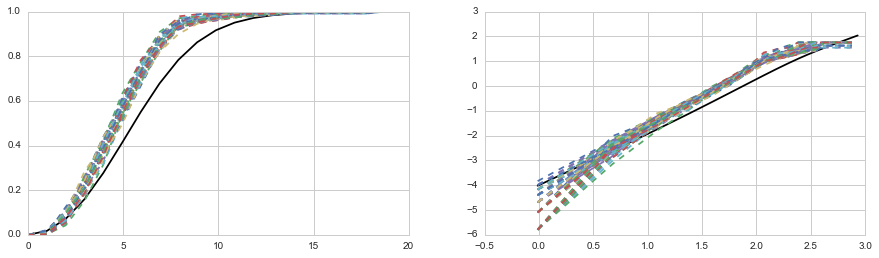

In [57]:
fig = plt.figure(figsize=(15,4))

x = linspace(0, max_speed, 20)
y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
direction_prob = integrate.nquad(f, [[0, inf],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_)[0])/direction_prob[0]

ax1 = fig.add_subplot(1,2,1) 
plt.plot(x, y_gmm,'-', color = 'black')

ax3 = fig.add_subplot(1,2,2) 
plt.plot(log(x), log(-log(1-y_gmm)),'-', color = 'black')

for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    
    sample = sub_df_resampled.speed
    ecdf = sm.distributions.ECDF(sample)
    y_cdf = ecdf(x)

    ax1 = fig.add_subplot(1,2,1) 
    plt.plot(x, y_cdf,'--')

    ax3 = fig.add_subplot(1,2,2) 
    plt.plot(log(x), log(-log(1-y_cdf)),'--')
    
diff = abs(y_cdf - y_gmm)
print diff.max(), x[diff.argmax()], y_gmm[diff.argmax()]

# 6. Variability of results & Cross-Validation

In [58]:
from sklearn.cross_validation import train_test_split, KFold

if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
    
points = FITTING_RANGE
    
def fit_gmm(df, number_of_gaussian = 3, fit_method = 'square_error'):
    # 1. Create Input, speed_set
    sample = sub_speed_set = array(zip(df.x, df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
    kde_result = exp(kde.score_samples(points))
    
    clf = mixture.GMM(n_components=number_of_gaussian, covariance_type='full')
    clf.fit(sample)
    gmm_em_result = read_gmm_em_result(clf)
        
    # 3. GMM fitting
    x0 = gmm_em_result
    bonds = [(0., 0.99),(-fit_limit, fit_limit),
             (-fit_limit, fit_limit),(0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*int(len(x0)/6)
    cons = [{'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
#             {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#             {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
           ]
 
    result = sp.optimize.minimize(
        lambda x0: GMM_fit_score(x0, kde_result, points, method=fit_method),
        x0,
        bounds = bonds,
        constraints = cons,
        tol = 0.000000000001,
        options = {"maxiter": 500})  
    
    # 4. Returns
    gmm = group_gmm_param_from_gmm_param_array(result.x)  
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    gmm_pdf_result = mixed_model_pdf(points)
    
    return {
        'gmm' : gmm,
        'kde_clf': kde,
        'kde_result': kde_result,
        'gmm_pdf_result': gmm_pdf_result,
        'number_of_iteration': result.nit,
    }

## 6.1 Variability of the Result

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.721382,-2.870203,-1.392396,5.629442,5.221318,0.069045
2,0.159726,4.649133,2.735667,2.689785,5.561770,0.162488
3,0.118893,1.723793,-0.853779,3.715159,2.347502,0.030919


GMM Plot Result
0.721381528647 [[-2.87020348 -1.39239555]] [ 5.14517326  5.69911998] -68.7466030264
0.159725844294 [[ 4.64913321  2.73566728]] [ 2.64351614  5.58390975] 174.2034201
0.118892627059 [[ 1.72379308 -0.85377882]] [ 2.34563569  3.7163376 ] -88.1392555575


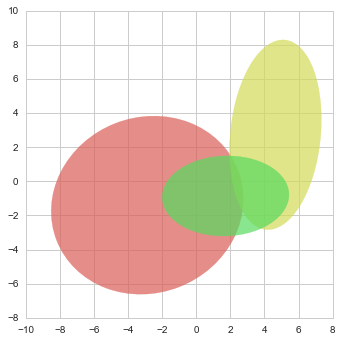

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.015828,0.009116,1.253328e-08,0.018979,0.109994,0.992999


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.683366,-3.036140,-1.396845,5.668914,5.272709,0.085174
2,0.184371,4.634390,2.446299,2.930146,5.813361,0.255937
3,0.132263,1.477546,-0.865077,3.835857,2.328128,-0.064206


GMM Plot Result
0.683366456248 [[-3.03613966 -1.396845  ]] [ 5.1599803   5.77171103] -65.2055118521
0.18437058786 [[ 4.63438952  2.44629908]] [ 2.80233964  5.87603717] 170.460416292
0.132262955892 [[ 1.47754642 -0.86507741]] [ 2.32054737  3.84044822] -93.5171464564


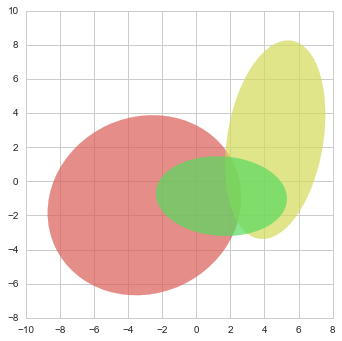

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.012423,0.006165,9.400604e-09,0.016504,0.095001,0.994733


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.755896,-2.487710,-1.339929,5.691286,4.893380,0.025765
2,0.175144,3.663165,3.270974,3.769821,5.466285,0.501098
3,0.068960,4.189517,-0.807014,2.123363,2.154483,-0.052051


GMM Plot Result
0.755895823004 [[-2.48770965 -1.33992858]] [ 4.88719111  5.69660166] -85.1781858683
0.175143974966 [[ 3.66316491  3.27097443]] [ 3.01400516  5.91672179] 153.593716486
0.0689602020298 [[ 4.18951741 -0.80701359]] [ 2.08038083  2.19601483] -142.808919349


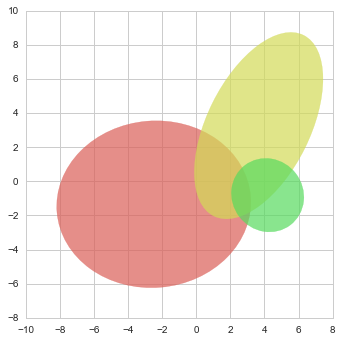

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.019205,0.00964,1.243637e-08,0.01837,0.109499,0.993132


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.736456,-2.733189,-1.215527,5.684436,5.188857,0.075345
2,0.157903,4.736798,2.446995,2.566528,5.778408,0.192209
3,0.105641,2.137285,-0.885507,3.372099,2.275288,0.066106


GMM Plot Result
0.736456063065 [[-2.73318935 -1.21552725]] [ 5.11135657  5.75422315] -70.2414820112
0.157902903083 [[ 4.73679812  2.44699527]] [ 2.50744064  5.80429204] 173.995973506
0.105641033852 [[ 2.13728483 -0.88550708]] [ 2.26620375  3.37821069] -85.3496461363


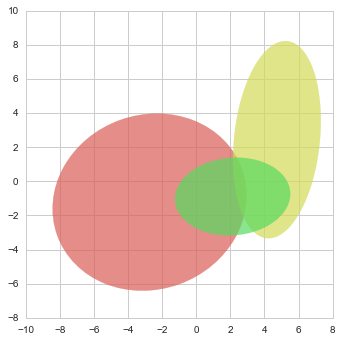

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.014273,0.008931,1.219012e-08,0.01814,0.108407,0.993163


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.717451,-2.726236,-1.379396,5.735813,5.302609,0.102530
2,0.169622,4.650769,2.394676,2.663791,5.610031,0.166382
3,0.112927,1.402803,-0.918263,3.605580,2.291468,0.120868


GMM Plot Result
0.71745149338 [[-2.7262361  -1.37939635]] [ 5.1554913   5.86840101] -63.7390205405
0.169621852325 [[ 4.65076893  2.39467567]] [ 2.61624877  5.63235918] 174.234970247
0.112926654296 [[ 1.40280297 -0.91826273]] [ 2.26367137  3.62309614] -82.7738964445


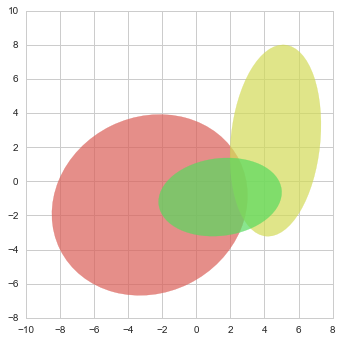

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.013339,0.008733,1.091345e-08,0.017446,0.102567,0.993865


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.669541,-3.102021,-1.363969,5.707654,5.420407,0.117353
2,0.168180,4.689213,2.170523,2.718666,5.688454,0.177757
3,0.162278,1.149168,-1.110354,3.957363,2.664332,0.019844


GMM Plot Result
0.66954132317 [[-3.10202096 -1.36396855]] [ 5.19732518  5.91150856] -56.8797632617
0.168180460935 [[ 4.68921284  2.17052324]] [ 2.66308989  5.71468356] 173.790584542
0.162278215895 [[ 1.14916818 -1.1103545 ]] [ 2.66337308  3.9580087 ] -88.6009506187


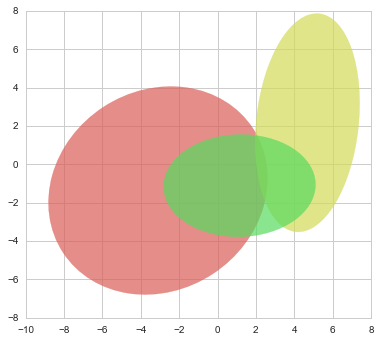

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.014389,0.006997,1.235551e-08,0.019053,0.109125,0.993086


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.704562,-3.107844,-1.425165,5.685145,5.118611,0.060795
2,0.176831,4.650076,2.999776,2.853814,5.597463,0.271847
3,0.118607,2.308759,-0.774851,3.422051,2.383368,0.058582


GMM Plot Result
0.704562349977 [[-3.10784409 -1.42516496]] [ 5.07204216  5.72672989] -74.9841952137
0.17683074539 [[ 4.65007576  2.99977597]] [ 2.71250299  5.66728991] 169.733062788
0.118606904633 [[ 2.30875885 -0.77485087]] [ 2.37546214  3.42754376] -85.4975603817


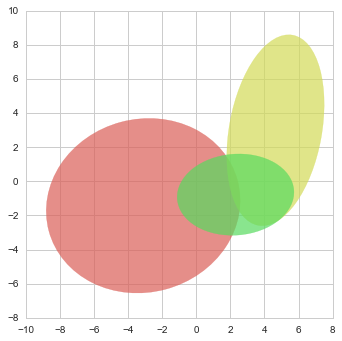

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.014168,0.007111,1.105965e-08,0.017288,0.103212,0.993753


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.690735,-2.766968,-1.283762,5.824213,5.441427,0.124846
2,0.156379,0.990495,-0.898781,3.808237,2.584592,0.111285
3,0.152886,4.715492,2.234190,2.524092,5.723984,0.183163


GMM Plot Result
0.690734699869 [[-2.76696813 -1.28376167]] [ 5.22104549  6.02256366] -59.2941292573
0.156379306427 [[ 0.99049548 -0.89878085]] [ 2.55531517  3.82794345] -82.1775890848
0.152885993705 [[ 4.71549207  2.23419015]] [ 2.47150179  5.7468877 ] 174.330379021


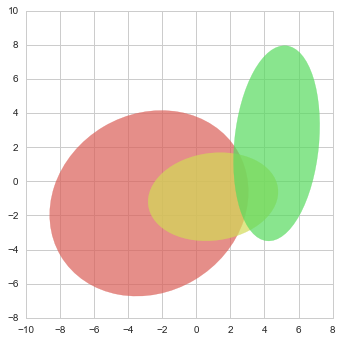

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.015882,0.008556,1.645416e-08,0.020688,0.125844,0.990998


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.774715,-2.336002,-1.390274,5.844911,4.977432,0.078869
2,0.155524,4.012016,3.504665,3.687450,5.204381,0.518493
3,0.069761,4.302076,-1.050540,2.199134,2.211346,-0.142301


GMM Plot Result
0.77471477668 [[-2.33600181 -1.39027404]] [ 4.92382506  5.89014059] -76.9751555474
0.155524204486 [[ 4.01201579  3.50466547]] [ 2.88459931  5.68875678] 152.064326532
0.0697610188338 [[ 4.3020764  -1.05053969]] [ 2.04219972  2.35704557] -136.114258141


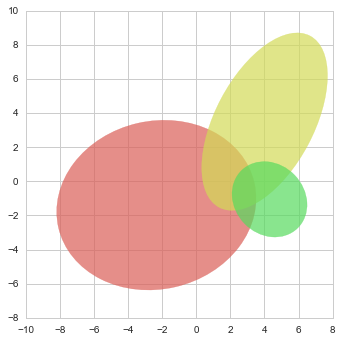

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.018278,0.011243,1.313473e-08,0.019368,0.112668,0.992472


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.677995,-3.227624,-1.391252,5.614211,5.308418,0.083440
2,0.193585,4.671794,2.183308,2.707457,5.438191,0.165257
3,0.128420,1.220939,-1.009565,4.040684,2.486357,-0.062424


GMM Plot Result
0.677994564147 [[-3.22762357 -1.39125244]] [ 5.18207121  5.73103854] -61.9422441826
0.193585471163 [[ 4.67179414  2.1833078 ]] [ 2.65843472  5.46232338] 173.829743075
0.12841996469 [[ 1.22093864 -1.00956535]] [ 2.47857854  4.0454599 ] -93.5239956619


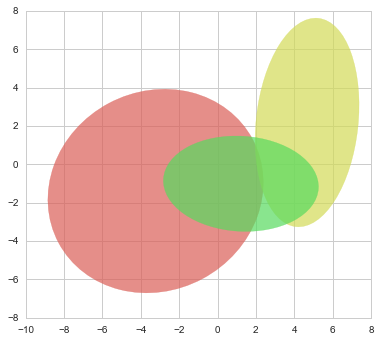

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.013884,0.009124,1.144269e-08,0.018671,0.105007,0.993452


In [59]:
for i in range(10):
    df_resampled = df.sample(frac=1, replace=True)
    result = fit_gmm(df_resampled, NUMBER_OF_GAUSSIAN, fit_method = FIT_METHOD)
    display(pretty_print_gmm(result['gmm']))
    plot_gmm_ellipses(result['gmm'])
    pretty_pd_display([goodness_of_fit_summary(result['gmm_pdf_result'], result['kde_result'])])

## 6.2 Cross-validation, to select the number of Gaussian

In [60]:
## 5-fold cross validation
gaussian_number_range = arange(1,7)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, number_of_gaussian, fit_method = FIT_METHOD)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        CV_result_train.append(gof_train)
        CV_result_test.append(gof_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print 'Train'
    pretty_pd_display(CV_result_train)
    print 'Test'
    pretty_pd_display(CV_result_test)

Number of train/test dataset 11226.75 3742.25
  
Number of gaussian 1
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.057592,0.053472,9.844626e-08,0.053123,0.308068,0.944435
1,0.056689,0.053786,1.017382e-07,0.053594,0.313059,0.942454
2,0.058010,0.054299,1.032136e-07,0.053671,0.315185,0.942017
3,0.057632,0.053901,1.044680e-07,0.054116,0.317650,0.940980


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.069525,0.063356,1.246939e-07,0.057914,0.346632,0.929909
1,0.064541,0.051112,1.007449e-07,0.053056,0.311920,0.943759
2,0.065799,0.050591,1.040255e-07,0.053656,0.317369,0.940783
3,0.061498,0.052895,1.086383e-07,0.055878,0.322632,0.939283


  
Number of gaussian 2
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.030265,0.028208,2.896839e-08,0.028365,0.167164,0.983642
1,0.029291,0.025683,2.708180e-08,0.027531,0.161594,0.984720
2,0.032208,0.026280,3.110237e-08,0.029575,0.173052,0.982618
3,0.029328,0.021793,2.581078e-08,0.027343,0.157739,0.985309


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.044715,0.026875,3.731774e-08,0.032707,0.189452,0.979098
1,0.040489,0.027422,3.762940e-08,0.032967,0.190366,0.978817
2,0.036839,0.027246,2.909372e-08,0.028572,0.167743,0.983166
3,0.037286,0.021342,4.378523e-08,0.033805,0.205417,0.975998


  
Number of gaussian 3
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.012505,0.007215,1.179627e-08,0.018837,0.106744,0.993257
1,0.010813,0.006710,1.018259e-08,0.016748,0.099030,0.994321
2,0.017010,0.009066,1.061247e-08,0.016897,0.101105,0.994061
3,0.012891,0.009098,1.049741e-08,0.017281,0.100566,0.994038


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.016772,0.015782,2.418235e-08,0.023856,0.152201,0.986942
1,0.020982,0.016566,2.562442e-08,0.027654,0.157361,0.985096
2,0.032158,0.017886,2.846330e-08,0.029800,0.165821,0.983619
3,0.021295,0.011876,1.798121e-08,0.022237,0.131753,0.990070


  
Number of gaussian 4
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.006815,0.004278,3.950531e-09,0.010316,0.061666,0.997789
1,0.005790,0.004794,3.232972e-09,0.009521,0.055867,0.998158
2,0.006227,0.004777,3.303634e-09,0.009789,0.056424,0.998129
3,0.006215,0.003886,3.335197e-09,0.009822,0.056703,0.998128


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.012725,0.010543,1.123575e-08,0.019140,0.104286,0.993526
1,0.015956,0.012045,1.492671e-08,0.020563,0.119677,0.991843
2,0.012375,0.006809,1.210341e-08,0.017742,0.108051,0.993262
3,0.012178,0.009004,1.239373e-08,0.018024,0.109285,0.992916


  
Number of gaussian 5
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.004166,0.006573,2.196987e-09,0.007834,0.046012,0.998758
1,0.003650,0.004961,1.889314e-09,0.007243,0.042629,0.998942
2,0.006074,0.008763,2.338843e-09,0.008263,0.047581,0.998668
3,0.004046,0.002835,2.435069e-09,0.008252,0.048406,0.998632


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.013950,0.010574,9.180049e-09,0.016329,0.094113,0.994864
1,0.011099,0.011972,1.270757e-08,0.019332,0.111031,0.992695
2,0.011595,0.009519,1.547742e-08,0.019876,0.121382,0.991540
3,0.010618,0.007647,9.633055e-09,0.016700,0.096612,0.994507


  
Number of gaussian 6
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.003066,0.003259,1.928039e-09,0.007442,0.043115,0.998917
1,0.002662,0.004213,1.809946e-09,0.007048,0.041770,0.998972
2,0.002924,0.004692,1.898249e-09,0.007284,0.042805,0.998930
3,0.003549,0.002337,1.434750e-09,0.006421,0.037158,0.999192


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.016529,0.012080,2.337570e-08,0.024995,0.150056,0.986740
1,0.010903,0.016003,1.786605e-08,0.022932,0.131225,0.990166
2,0.010469,0.014940,1.255507e-08,0.019082,0.109785,0.992911
3,0.011739,0.015942,1.077443e-08,0.016963,0.102160,0.993912


In [61]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print 'Train gof mean, std'
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print 'Test gof mean, std'
display(test_scores_mean)

Train gof mean, std


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.057481,0.053864,1.019665e-07,0.053626,0.313491,0.942472
1,0.030273,0.025491,2.824083e-08,0.028204,0.164887,0.984072
2,0.013305,0.008022,1.077218e-08,0.017441,0.101861,0.993919
3,0.006262,0.004434,3.455584e-09,0.009862,0.057665,0.998051
4,0.004484,0.005783,2.215053e-09,0.007898,0.046157,0.998750
5,0.003050,0.003625,1.767746e-09,0.007049,0.041212,0.999003


Test gof mean, std


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.065341,0.054489,1.095257e-07,0.055126,0.324638,0.938434
1,0.039832,0.025721,3.695652e-08,0.032013,0.188245,0.979270
2,0.022802,0.015527,2.406282e-08,0.025887,0.151784,0.986431
3,0.013308,0.009600,1.266490e-08,0.018867,0.110325,0.992887
4,0.011816,0.009928,1.174952e-08,0.018059,0.105785,0.993402
5,0.012410,0.014741,1.614281e-08,0.020993,0.123306,0.990932


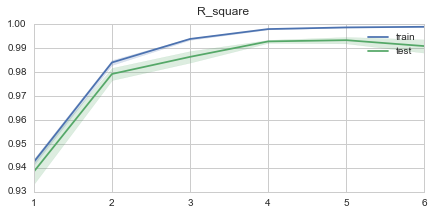

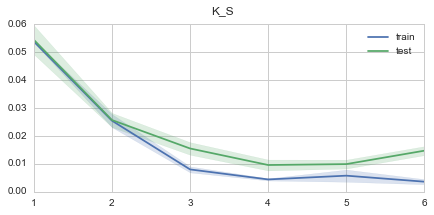

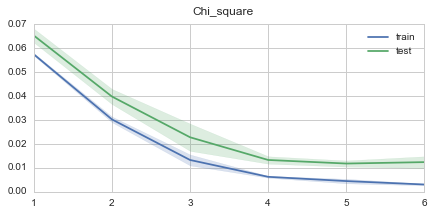

In [62]:
prop_cycle=sns.color_palette()
for column in ['R_square','K_S','Chi_square', ]:
    fig, ax = plt.subplots()
    fig.set_size_inches(7, 3)
    plt.plot(gaussian_number_range, train_scores_mean[column],
             '-', label = 'train', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plt.plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.suptitle(column)
    plt.xticks(gaussian_number_range)
    plt.legend()
    plt.show()

In [63]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(ipath)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 
output_HTML(current_file, output_file)

## 6.3 Variability of KDE

In [64]:
sss

NameError: name 'sss' is not defined

In [ ]:
gmm1 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,
        0.372591,2.376362,-2.098443,1.621717,2.213625,-0.01429,
        0.055879,1.009152,-1.430799,2.10049,0.808011,0.08083,
        0.019425,-0.432981,2.574572,0.784784,0.796954,-0.020531]

gmm2 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,
        0.372591,2.376362,-2.098443,1.621717,2.213625,-0.01429,]

gmm3 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,]

gmms = [gmm1,gmm2,gmm3]
pdfs =[]

for gmm in gmms:
    plot_gmm_ellipses(gmm)
    gmm = group_gmm_param_from_gmm_param_array(gmm) 
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    X = Y = PLOT_AXIS_RANGE
    pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument
    pdfs.append(pdf_Z)
    plot_2d_prob_density(X,Y,pdf_Z)

In [ ]:
plot_2d_prob_density(X,Y,pdfs[0]-pdfs[1])

In [ ]:
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    sub_df = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    sample = sub_speed_set = array(zip(sub_df.x, sub_df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
    
    X = Y = PLOT_AXIS_RANGE
    kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
    fig, ax = plt.subplots()
    fig.set_size_inches(14, 4)
    plot_2d_prob_density(X,Y,kde_Z,ax)
    plt.show()
#     plot_speed_and_angle_distribution(sub_df.speed, sub_df.dir)

In [ ]:
# 5-fold cross validation
gaussian_number_range = arange(3,5)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, number_of_gaussian, fit_method = FIT_METHOD)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_train = result['kde_clf']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        # Plot jPDF
        X = Y = PLOT_AXIS_RANGE
        kde_train_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde_train.score_samples(coords)))
        fig = plt.figure(figsize=(22,6))
        ax1 = fig.add_subplot(1,3,1)
        plot_2d_prob_density(X,Y,kde_train_Z, ax1)
        
        ax2 = fig.add_subplot(1,3,2)
        kde_test_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde_test.score_samples(coords)))
        plot_2d_prob_density(X,Y,kde_test_Z, ax2)
            
        ax3 = fig.add_subplot(1,3,3)
        plot_2d_prob_density(X,Y,kde_train_Z-kde_test_Z,ax3)
        
        pretty_pd_display([gof_train, gof_test], index=["gof_train", "gof_test"]))
        